In [1]:
import tensorflow as tf
import matplotlib.pylab as plt
import cv2
import numpy as np

tflite_model_file = 'exported_models/1_tflite/pose_mobilenet.tflite'

interpreter = tf.lite.Interpreter(model_path=tflite_model_file)

inp_index = interpreter.get_input_details()[0]["index"]

out_details = sorted(interpreter.get_output_details(), key=lambda k: k['index']) 

paf_idx = out_details[-1]["index"]
heatmap_idx = out_details[-2]["index"]

In [5]:
test_image = 'sample_images/ski_224.jpg'

img = cv2.imread(test_image) # B,G,R order
img = np.expand_dims(img, 0)

input_tensor= tf.convert_to_tensor(img, np.float32)

interpreter.allocate_tensors()

interpreter.set_tensor(inp_index, input_tensor)

interpreter.invoke()

heatmaps = interpreter.get_tensor(heatmap_idx)
pafs = interpreter.get_tensor(paf_idx)

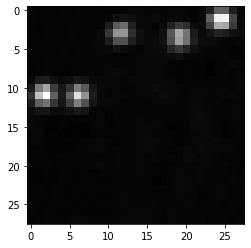

In [6]:
plt.imshow(heatmaps[0,:,:,0], cmap='gray')

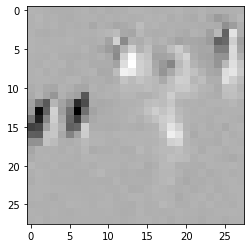

In [8]:
plt.imshow(pafs[0,:,:,0], cmap='gray')

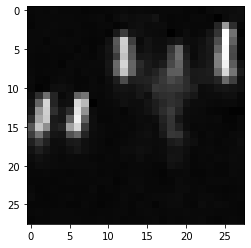

In [9]:
plt.imshow(pafs[0,:,:,1], cmap='gray')